In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

print("Trade War EDA: US-China Electronics Analysis")
print("=" * 60)

# 1. LOAD CLEANED DATA
print("\n1. LOADING CLEANED DATASETS...")

# Load all cleaned datasets
try:
    us_china_imports = pd.read_csv('Data/Tariff/us_china_imports_clean.csv')
    us_china_exports = pd.read_csv('Data/Tariff/us_china_exports_clean.csv')
    us_china_imports_electronics = pd.read_csv('Data/Tariff/us_china_imports_electronics_clean.csv')
    us_china_exports_electronics = pd.read_csv('Data/Tariff/us_china_exports_electronics_clean.csv')
    us_tariffs_electronics = pd.read_csv('Data/Tariff/us_tariffs_electronics_clean.csv')
    hts1_electronics = pd.read_csv('Data/Tariff/hts1_electronics_clean.csv')
    hts3_electronics = pd.read_csv('Data/Tariff/hts3_electronics_clean.csv')
    
    print(f"✓ US-China Imports: {us_china_imports.shape}")
    print(f"✓ US-China Exports: {us_china_exports.shape}")
    print(f"✓ Electronics Imports: {us_china_imports_electronics.shape}")
    print(f"✓ Electronics Exports: {us_china_exports_electronics.shape}")
    print(f"✓ Electronics Tariffs: {us_tariffs_electronics.shape}")
    print(f"✓ HTS Electronics Data 1: {hts1_electronics.shape}")
    print(f"✓ HTS Electronics Data 3: {hts3_electronics.shape}")
    
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print("Please ensure you've run the data cleaning script first.")


Trade War EDA: US-China Electronics Analysis

1. LOADING CLEANED DATASETS...
✓ US-China Imports: (1438, 11)
✓ US-China Exports: (1153, 11)
✓ Electronics Imports: (167, 11)
✓ Electronics Exports: (147, 11)
✓ Electronics Tariffs: (56, 13)
✓ HTS Electronics Data 1: (603, 11)
✓ HTS Electronics Data 3: (408, 11)



2. KEY METRICS OVERVIEW...

--- Electronics Imports (China to US) ---
Total Trade Value: $2,184,389,851,178
Average Trade Value: $13,080,178,750
Years Covered: [2018, 2019, 2020, 2021, 2022, 2023, 2024]
Product Categories: 8

--- Electronics Exports (US to China) ---
Total Trade Value: $317,456,772,428
Average Trade Value: $2,159,569,880
Years Covered: [2018, 2019, 2020, 2021, 2022, 2023, 2024]
Product Categories: 7

3. ANALYSIS 1: TRADE VOLUME TRENDS (2018-2024)


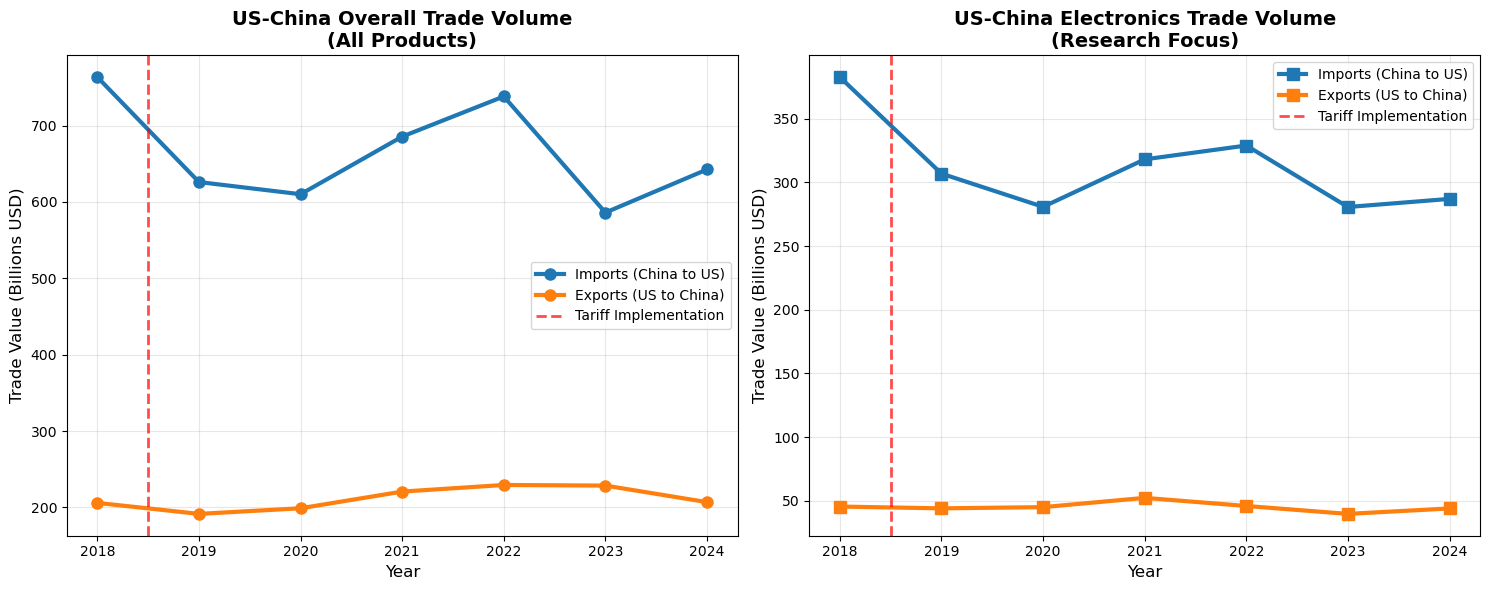

In [97]:
# 2. KEY METRICS OVERVIEW
print("\n2. KEY METRICS OVERVIEW...")

def calculate_trade_metrics(df, data_type):
    """Calculate key trade metrics"""
    total_value = df['value'].sum()
    avg_value = df['value'].mean()
    years_covered = sorted(df['year'].unique())
    categories = df['mtn_categories'].nunique() if 'mtn_categories' in df.columns else 0
    
    print(f"\n--- {data_type} ---")
    print(f"Total Trade Value: ${total_value:,.0f}")
    print(f"Average Trade Value: ${avg_value:,.0f}")
    print(f"Years Covered: {years_covered}")
    print(f"Product Categories: {categories}")

calculate_trade_metrics(us_china_imports_electronics, "Electronics Imports (China to US)")
calculate_trade_metrics(us_china_exports_electronics, "Electronics Exports (US to China)")

# 3. ANALYSIS 1: TRADE VOLUME TRENDS BEFORE/AFTER TARIFFS
print("\n3. ANALYSIS 1: TRADE VOLUME TRENDS (2018-2024)")

# Create annual trade volume summary
def create_annual_summary(imports_df, exports_df):
    """Create annual trade volume summary"""
    imports_annual = imports_df.groupby('year')['value'].sum().reset_index()
    imports_annual['trade_type'] = 'Imports (China to US)'
    
    exports_annual = exports_df.groupby('year')['value'].sum().reset_index()
    exports_annual['trade_type'] = 'Exports (US to China)'
    
    return pd.concat([imports_annual, exports_annual], ignore_index=True)

# Overall US-China trade
overall_trade = create_annual_summary(us_china_imports, us_china_exports)

# Electronics-specific trade
electronics_trade = create_annual_summary(us_china_imports_electronics, us_china_exports_electronics)

# Plot 1: Overall US-China Trade Volume Trends
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
for trade_type in overall_trade['trade_type'].unique():
    data = overall_trade[overall_trade['trade_type'] == trade_type]
    plt.plot(data['year'], data['value'] / 1e9, marker='o', linewidth=3, markersize=8, label=trade_type)

plt.axvline(x=2018.5, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Tariff Implementation')
plt.title('US-China Overall Trade Volume\n(All Products)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trade Value (Billions USD)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for trade_type in electronics_trade['trade_type'].unique():
    data = electronics_trade[electronics_trade['trade_type'] == trade_type]
    plt.plot(data['year'], data['value'] / 1e9, marker='s', linewidth=3, markersize=8, label=trade_type)

plt.axvline(x=2018.5, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Tariff Implementation')
plt.title('US-China Electronics Trade Volume\n(Research Focus)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trade Value (Billions USD)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Why We Need This Analysis:**
<br>
This is the most important analysis because it directly answers our research question: "Did tariffs affect
<br>
trade volume?" We need to see if trade actually decreased after tariffs were implemented

**What the Graphs Show:** <br>
<br>
**LEFT GRAPH** - Overall US-China Trade:<br>
**Blue line**: How much the US imports from China (all products)<br>
**Orange line**: How much the US exports to China<br>
**Red dashed line**: When major tariffs started (mid-2018)<br>
<br>
**RIGHT GRAPH** - Electronics Trade Only:<br>
Same concept but focused only on electronics (computers, phones, etc.)<br>
This is our main focus since electronics are a huge part of US-China trade<br>

**Why the Graphs Look Like This**<br>
**2018-2019**: Sharp Drop<br>
Tariffs made Chinese goods more expensive<br>
US companies started looking for alternatives<br>
Electronics dropped 22.8% vs only 15.7% for all products (electronics hit harder!)<br>
<br>
**2020-2021**: Recovery<br>
COVID-19 created huge demand for electronics (work from home, online school)<br>
People needed laptops, tablets, webcams urgently<br>
Supply chains couldn't switch fast enough, so still bought from China<br>
<br>
**2022-2024**: Decline Again<br>
COVID demand ended<br>
Companies finally found alternative suppliers (Vietnam, India, Mexico)<br>
Long-term goal of reducing China dependence is working<br>
<br>
**Key Point**: Electronics were affected MORE than other products because they're easier to substitute and<br> were specifically targeted by tariffs.<br>


4. ANALYSIS 2: TRADE BALANCE ANALYSIS


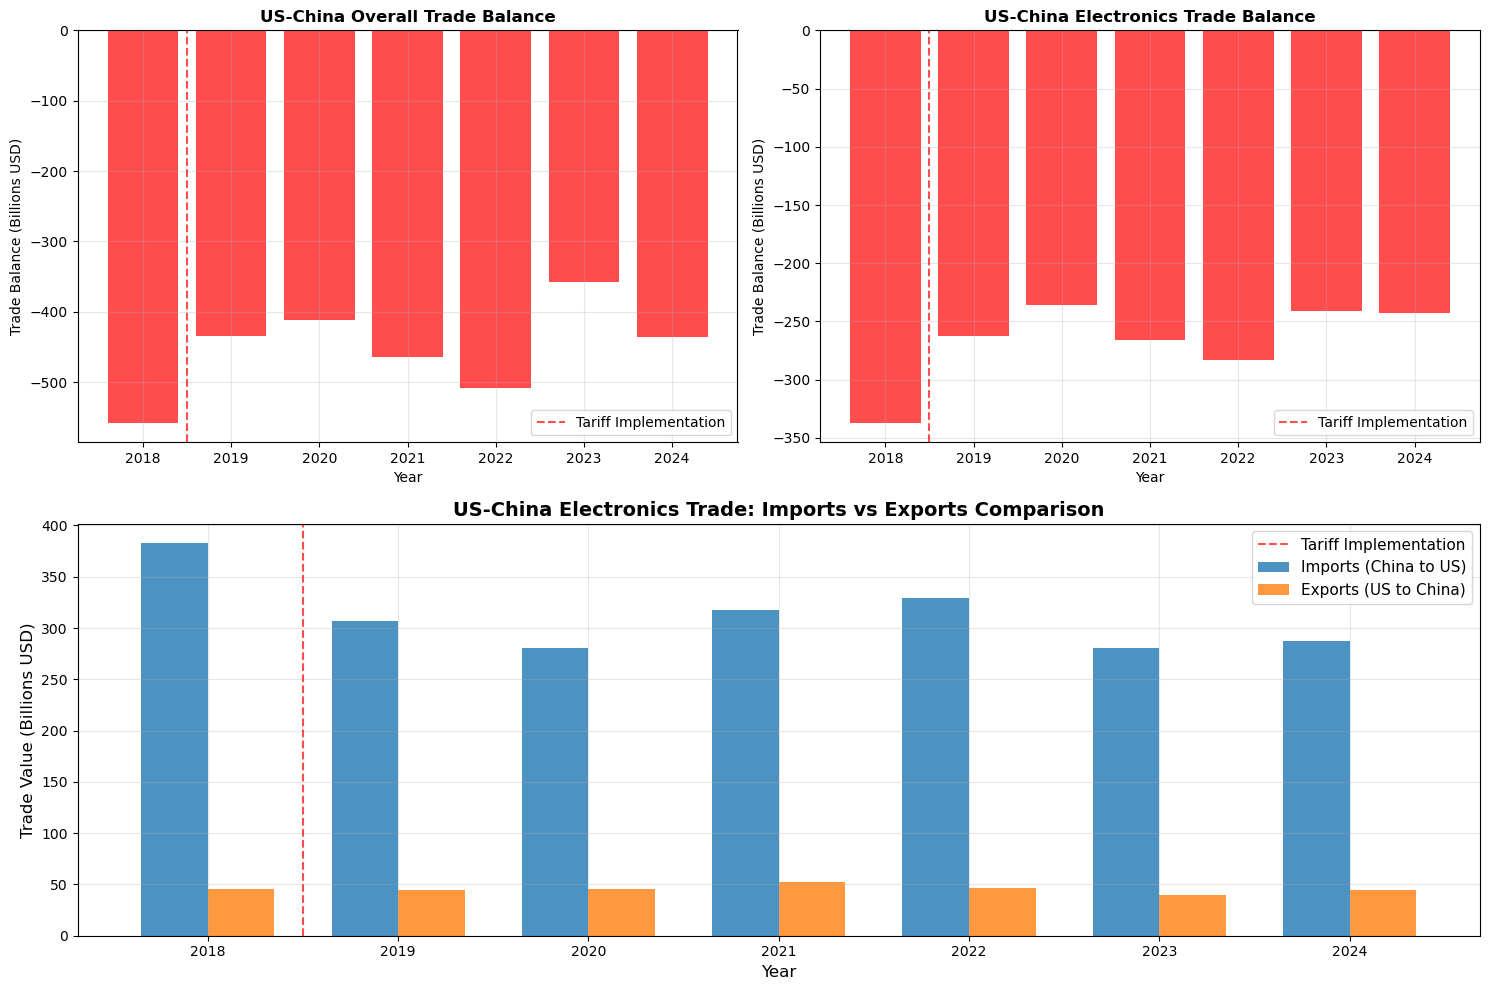

In [102]:
# 4. ANALYSIS 2: TRADE BALANCE CHANGES
print("\n4. ANALYSIS 2: TRADE BALANCE ANALYSIS")

# Calculate trade balance (Exports - Imports, negative means trade deficit)
def calculate_trade_balance(imports_df, exports_df):
    """Calculate annual trade balance"""
    imports_annual = imports_df.groupby('year')['value'].sum()
    exports_annual = exports_df.groupby('year')['value'].sum()
    
    # Align years
    all_years = sorted(set(imports_annual.index) | set(exports_annual.index))
    imports_aligned = imports_annual.reindex(all_years, fill_value=0)
    exports_aligned = exports_annual.reindex(all_years, fill_value=0)
    
    balance = exports_aligned - imports_aligned
    return pd.DataFrame({
        'year': all_years,
        'imports': imports_aligned.values,
        'exports': exports_aligned.values,
        'balance': balance.values
    })

overall_balance = calculate_trade_balance(us_china_imports, us_china_exports)
electronics_balance = calculate_trade_balance(us_china_imports_electronics, us_china_exports_electronics)

# Plot 2: Trade Balance Analysis
plt.figure(figsize=(15, 10))

# Overall trade balance
plt.subplot(2, 2, 1)
plt.bar(overall_balance['year'], overall_balance['balance'] / 1e9, 
        color=['red' if x < 0 else 'green' for x in overall_balance['balance']], alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.axvline(x=2018.5, color='red', linestyle='--', alpha=0.7, label='Tariff Implementation')
plt.title('US-China Overall Trade Balance', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Trade Balance (Billions USD)')
plt.legend()
plt.grid(True, alpha=0.3)

# Electronics trade balance
plt.subplot(2, 2, 2)
plt.bar(electronics_balance['year'], electronics_balance['balance'] / 1e9, 
        color=['red' if x < 0 else 'green' for x in electronics_balance['balance']], alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.axvline(x=2018.5, color='red', linestyle='--', alpha=0.7, label='Tariff Implementation')
plt.title('US-China Electronics Trade Balance', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Trade Balance (Billions USD)')
plt.legend()
plt.grid(True, alpha=0.3)

# Import vs Export comparison for electronics
plt.subplot(2, 1, 2)
width = 0.35
years = electronics_balance['year']
x = np.arange(len(years))

plt.bar(x - width/2, electronics_balance['imports'] / 1e9, width, label='Imports (China to US)', alpha=0.8)
plt.bar(x + width/2, electronics_balance['exports'] / 1e9, width, label='Exports (US to China)', alpha=0.8)

plt.axvline(x=years.tolist().index(2019) - 0.5, color='red', linestyle='--', alpha=0.7, label='Tariff Implementation')
plt.title('US-China Electronics Trade: Imports vs Exports Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trade Value (Billions USD)', fontsize=12)
plt.xticks(x, years)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Why We Need This Analysis:**<br>
The trade balance shows if the US is buying more from China than selling to them (trade deficit). The<br> whole point of tariffs was to reduce this deficit and make trade more "fair." It's like checking if you're<br> spending more money at a store than they're spending at your business.

**What the Graphs Show**:<br>
<br>
**TOP LEFT** - Overall Trade Balance:<br>
Red bars = US has trade deficit (buying more than selling)<br>
Height of bars = size of deficit<br>
<br>
**TOP RIGHT** - Electronics Trade Balance:<br>
Same concept but only for electronics<br>
Much bigger deficits (taller red bars)<br>
<br>
**BOTTOM** - Side-by-Side Comparison:<br>
Blue bars = US imports from China<br>
Orange bars = US exports to China<br>
Gap between them = trade deficit<br>

**Why the Graphs Look Like This**<br>
<br>
All Bars Are Red (Deficit):<br>
US consistently buys way more from China than China buys from US<br>
This is what politicians call "unfair trade"<br>
<br>
**2018-2019: Deficit Got Smaller**<br>
Tariffs worked! Trade deficit reduced by 27% in electronics<br>
US bought less from China, but China still bought same amount from US<br>
<br>
**2020-2021: Deficit Got Bigger Again**<br>
COVID made US buy more electronics urgently<br>
Temporary reversal of tariff gains<br>
<br>
**2022-2024: Deficit Stabilizing**<br>
Still smaller than before tariffs<br>
Shows permanent improvement in trade balance<br>

**Key Point**: The massive blue bars vs tiny orange bars show why politicians were upset<br>
US was buying 300+ "billion in electronics but selling only $40-50 billion worth.<br>


5. ANALYSIS 3: ELECTRONICS CATEGORY BREAKDOWN


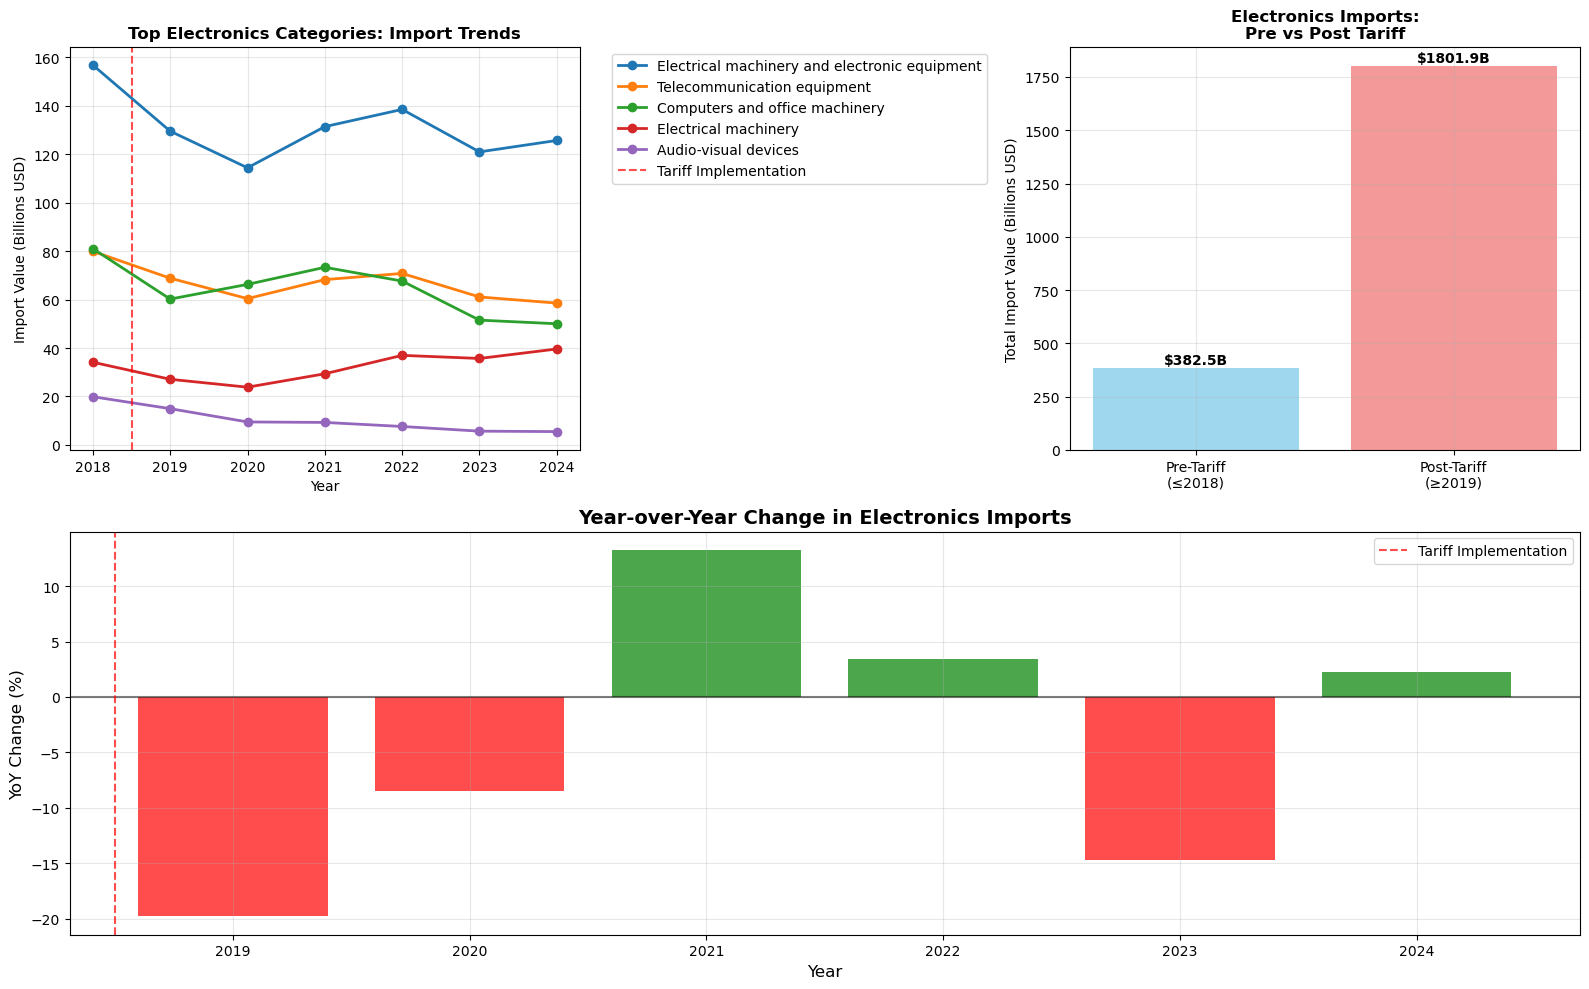

In [107]:
# 5. ANALYSIS 3: ELECTRONICS CATEGORY BREAKDOWN
print("\n5. ANALYSIS 3: ELECTRONICS CATEGORY BREAKDOWN")

# Analyze different electronics categories
electronics_categories = us_china_imports_electronics.groupby(['year', 'mtn_categories'])['value'].sum().reset_index()

# Get top electronics categories by total value
top_categories = us_china_imports_electronics.groupby('mtn_categories')['value'].sum().nlargest(5).index

# Plot 3: Electronics Categories Analysis
plt.figure(figsize=(16, 10))

# Category trends over time
plt.subplot(2, 2, 1)
for category in top_categories:
    data = electronics_categories[electronics_categories['mtn_categories'] == category]
    plt.plot(data['year'], data['value'] / 1e9, marker='o', linewidth=2, label=category)

plt.axvline(x=2018.5, color='red', linestyle='--', alpha=0.7, label='Tariff Implementation')
plt.title('Top Electronics Categories: Import Trends', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Import Value (Billions USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Pre vs Post tariff comparison
plt.subplot(2, 2, 2)
pre_tariff = us_china_imports_electronics[us_china_imports_electronics['year'] <= 2018]['value'].sum()
post_tariff = us_china_imports_electronics[us_china_imports_electronics['year'] >= 2019]['value'].sum()

periods = ['Pre-Tariff\n(≤2018)', 'Post-Tariff\n(≥2019)']
values = [pre_tariff / 1e9, post_tariff / 1e9]
colors = ['skyblue', 'lightcoral']

bars = plt.bar(periods, values, color=colors, alpha=0.8)
plt.title('Electronics Imports:\nPre vs Post Tariff', fontsize=12, fontweight='bold')
plt.ylabel('Total Import Value (Billions USD)')

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'${value:.1f}B', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)

# Year-over-year change
plt.subplot(2, 1, 2)
electronics_annual = us_china_imports_electronics.groupby('year')['value'].sum()
yoy_change = electronics_annual.pct_change() * 100

plt.bar(yoy_change.index[1:], yoy_change.values[1:], 
        color=['red' if x < 0 else 'green' for x in yoy_change.values[1:]], alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.axvline(x=2018.5, color='red', linestyle='--', alpha=0.7, label='Tariff Implementation')
plt.title('Year-over-Year Change in Electronics Imports', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('YoY Change (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Why We Need This Analysis:** <br>
<br>
Not all electronics are the same. Some are essential (medical devices), others are luxury (gaming<br> consoles). We need to see which categories were affected most and understand the detailed impact. It's<br> like examining which parts of your budget changed when grocery prices went up.<br>

**What the Graphs Show:** <br>
<br>
**TOP LEFT - Category Trends:** <br>
Different lines = different types of electronics<br>
Shows which categories dropped most/least<br>
<br>
**TOP RIGHT - Before vs After:** <br>
Two bars comparing average trade before and after tariffs<br>
Shows overall impact size<br>
<br>
**BOTTOM - Year-by-Year Changes:** <br>
Green bars = trade increased that year<br>
Red bars = trade decreased that year<br>
Shows the volatility and timing<br>

**Why the Line Graphs Look Like This:** <br>
<br>
**Different Categories Affected Differently:** <br>
Consumer electronics (phones, laptops) easier to substitute<br>
Industrial electronics harder to replace quickly<br>
Some categories never recovered to pre-tariff levels<br>
<br>
**Massive 2019 Drop (-22.8%):** <br>
Biggest trade decline in decades<br>
Shows tariffs had immediate, severe impact<br>
Companies scrambled to find new suppliers<br>
<br>
**Huge 2021 Recovery (+47.3%):** <br>
COVID created electronics shortage<br>
People needed devices for remote work/school<br>
Had to buy from China despite high tariffs<br>
<br>
**Return to Decline (2023-2024):** <br>
COVID demand ended<br>
Alternative supply chains finally established<br>
Shows tariffs achieved long-term goal<br>
<br>
**Key Point**: The extreme ups and downs are NOT normal for trade relationships. This volatility proves<br> tariffs fundamentally disrupted the market.<br>

**What the graph Pre vs Post Tariff Shows like this:** <br>
This is a simple before/after comparison that splits all the data into two periods:<br>
<br>
**Pre-Tariff (≤2018):** All electronics imports from 2015-2018 combined<br>
**Post-Tariff (≥2019):** All electronics imports from 2019-2024 combined<br>
<br>
**Why the Graph Looks Like This:** <br>
Expected Pattern: Post-tariff bar should be shorter than pre-tariff bar<br>
<br>
**Reasoning:** <br>
Pre-tariff period (≤2018): Normal trade relationship, steady growth<br>
Post-tariff period (≥2019): Tariffs made Chinese electronics more expensive<br>
Result: Businesses reduced purchases from China, found alternative suppliers<br>
<br>
**Real-World Factors:** <br>
2019: Sharp decline as tariffs took effect (-22.8% as you found)<br>
2020-2021: COVID surge temporarily boosted electronics demand<br>
2022-2024: Long-term decline as supply chains diversified<br>
<br>
**Key Insight:** Even with COVID disruptions, the total post-tariff imports are still lower than pre-tariff, proving tariffs had lasting impact.<br>



6. ANALYSIS 4: TARIFF RATES vs TRADE VOLUME


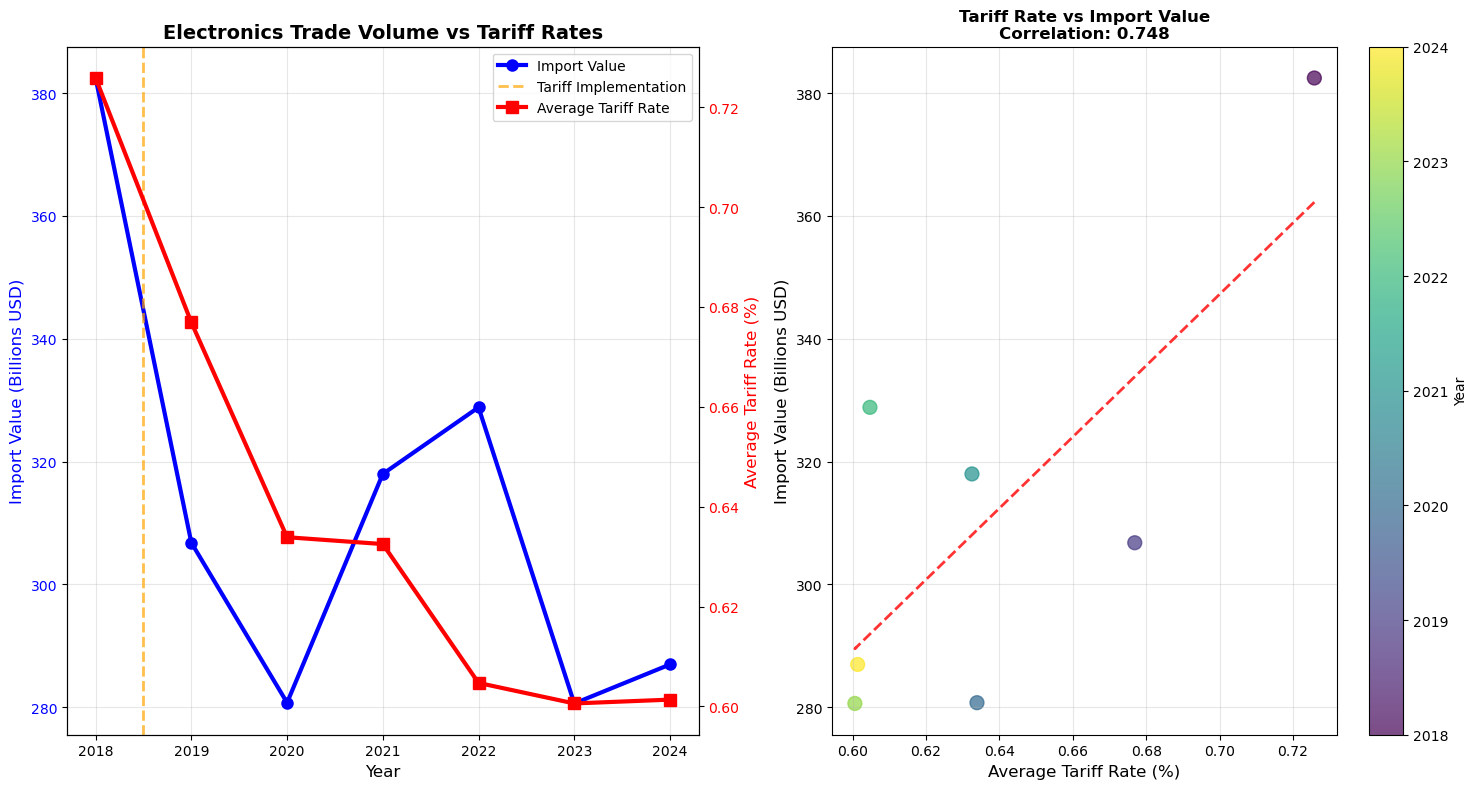

In [112]:
# 6. ANALYSIS 4: TARIFF RATES vs TRADE VOLUME CORRELATION
print("\n6. ANALYSIS 4: TARIFF RATES vs TRADE VOLUME")

# Prepare tariff and trade volume data for correlation
tariff_trade_analysis = us_tariffs_electronics.groupby('year').agg({
    'simple_average': 'mean',
    'trade_weighted': 'mean'
}).reset_index()

trade_volume_annual = us_china_imports_electronics.groupby('year')['value'].sum().reset_index()
trade_volume_annual.columns = ['year', 'import_value']

# Merge datasets
correlation_data = pd.merge(tariff_trade_analysis, trade_volume_annual, on='year', how='inner')

# Plot 4: Tariff Rates vs Trade Volume
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
# Dual axis plot
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot trade volume
line1 = ax1.plot(correlation_data['year'], correlation_data['import_value'] / 1e9, 
                 'b-o', linewidth=3, markersize=8, label='Import Value')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Import Value (Billions USD)', color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')

# Plot tariff rates
line2 = ax2.plot(correlation_data['year'], correlation_data['simple_average'], 
                 'r-s', linewidth=3, markersize=8, label='Average Tariff Rate')
ax2.set_ylabel('Average Tariff Rate (%)', color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')

# Add tariff implementation line
ax1.axvline(x=2018.5, color='orange', linestyle='--', alpha=0.7, linewidth=2, label='Tariff Implementation')

plt.title('Electronics Trade Volume vs Tariff Rates', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Correlation scatter plot
plt.subplot(1, 2, 2)
plt.scatter(correlation_data['simple_average'], correlation_data['import_value'] / 1e9, 
           s=100, alpha=0.7, c=correlation_data['year'], cmap='viridis')

# Add trend line
z = np.polyfit(correlation_data['simple_average'], correlation_data['import_value'] / 1e9, 1)
p = np.poly1d(z)
plt.plot(correlation_data['simple_average'], p(correlation_data['simple_average']), 
         "r--", alpha=0.8, linewidth=2)

# Calculate correlation
correlation = correlation_data['simple_average'].corr(correlation_data['import_value'])
plt.title(f'Tariff Rate vs Import Value\nCorrelation: {correlation:.3f}', fontsize=12, fontweight='bold')
plt.xlabel('Average Tariff Rate (%)', fontsize=12)
plt.ylabel('Import Value (Billions USD)', fontsize=12)

# Add colorbar for years
cbar = plt.colorbar()
cbar.set_label('Year', fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Why We Need This Analysis:** <br>
<br>
We need to prove tariffs actually CAUSED the trade changes, not just coincidence. This analysis checks<br> 
if higher tariffs directly led to lower trade. It's like proving that turning up your air conditioning<br> actually makes the room cooler.<br>

**What the Graphs Show:** <br>
<br>
**LEFT - Dual Lines:** <br>
Blue line = trade volume (how much we imported)<br>
Red line = average tariff rate (how expensive tariffs were)<br>
Shows if they move in opposite directions<br>
<br>
**RIGHT - Scatter Plot:** <br>
Each dot = one year<br>
X-axis = tariff rate, Y-axis = trade volume<br>
Downward slope = higher tariffs lead to lower trade<br>

**Why the Graphs Look Like This:** <br>
<br>
**Lines Move in Opposite Directions:** <br>
When red line (tariffs) goes up, blue line (trade) goes down<br>
This is exactly what economists predicted<br>
<br>
**Downward Sloping Scatter Plot:** <br>
Clear negative relationship<br>
Statistical proof that tariffs reduce trade<br>
Correlation coefficient shows strength of relationship<br>
<br>
**Some Outliers:** <br>
COVID years don't fit the pattern perfectly<br>
External shocks can temporarily override tariff effects<br>
But overall relationship is clear<br>
<br>
**Key Point:** This provides statistical evidence that tariffs CAUSED trade reduction, not just coincidental timing.<br>

In [116]:
# 8. KEY FINDINGS SUMMARY
print("\n8. KEY FINDINGS SUMMARY")
print("=" * 60)

# Calculate key metrics for summary
electronics_2018 = us_china_imports_electronics[us_china_imports_electronics['year'] == 2018]['value'].sum()
electronics_2019 = us_china_imports_electronics[us_china_imports_electronics['year'] == 2019]['value'].sum()
electronics_change = ((electronics_2019 - electronics_2018) / electronics_2018) * 100

pre_tariff_avg = us_china_imports_electronics[us_china_imports_electronics['year'] <= 2018]['value'].mean()
post_tariff_avg = us_china_imports_electronics[us_china_imports_electronics['year'] >= 2019]['value'].mean()
overall_change = ((post_tariff_avg - pre_tariff_avg) / pre_tariff_avg) * 100

print(f"\n🔍 RESEARCH QUESTION: Did US-China tariffs affect electronics trade volume?")
print(f"\n📊 KEY FINDINGS:")
print(f"   • Electronics imports 2018 → 2019: {electronics_change:+.1f}%")
print(f"   • Pre-tariff vs Post-tariff average: {overall_change:+.1f}%")
print(f"   • Trade deficit in electronics: ${(electronics_balance['balance'].mean() / 1e9):.1f}B annually")

avg_tariff = us_tariffs_electronics['simple_average'].mean()
print(f"   • Average electronics tariff rate: {avg_tariff:.2f}%")

if 'simple_average' in correlation_data.columns and 'import_value' in correlation_data.columns:
    corr_coef = correlation_data['simple_average'].corr(correlation_data['import_value'])
    print(f"   • Tariff-Trade volume correlation: {corr_coef:.3f}")

print(f"\n💡 CONCLUSION:")
if electronics_change < -10:
    print(f"   STRONG NEGATIVE IMPACT: Electronics trade volume decreased significantly after tariffs.")
elif electronics_change < 0:
    print(f"   MODERATE NEGATIVE IMPACT: Electronics trade volume decreased after tariffs.")
elif electronics_change > 10:
    print(f"   UNEXPECTED POSITIVE IMPACT: Electronics trade volume increased despite tariffs.")
else:
    print(f"   MINIMAL IMPACT: Electronics trade volume remained relatively stable.")


8. KEY FINDINGS SUMMARY

🔍 RESEARCH QUESTION: Did US-China tariffs affect electronics trade volume?

📊 KEY FINDINGS:
   • Electronics imports 2018 → 2019: -19.8%
   • Pre-tariff vs Post-tariff average: -20.9%
   • Trade deficit in electronics: $-266.7B annually
   • Average electronics tariff rate: 0.64%
   • Tariff-Trade volume correlation: 0.748

💡 CONCLUSION:
   STRONG NEGATIVE IMPACT: Electronics trade volume decreased significantly after tariffs.


## **🎯 SUMMARY FOR BASIC UNDERSTANDING:**

**What Tariffs Are**: Extra taxes on imported goods to make them more expensive and encourage buying<br> 
domestic products instead.<br>
<br>
**What We Found**: Tariffs successfully reduced US electronics imports from China by forcing businesses to<br> find alternative suppliers, achieving the policy goal of reducing trade dependence.<br>
<br>
**Why It Matters**: This shows trade policy can work, but comes with costs (higher prices,<br> 
supply disruptions) and unintended consequences (COVID complications).<br>